In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ncr_ride_bookings.csv')

# DATA UNDERSTANDING

In [3]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
df = df.set_index('Date')

In [5]:
df.head()

,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
Date,,,,,,,,,,,,,,,,,,,,
2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [6]:
df[df['Driver Ratings'].notna()]

,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
Date,,,,,,,,,,,,,,,,,,,,
2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,NaN,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,NaN,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,NaN,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 2024-03-23 to 2024-03-10
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Time                               150000 non-null  object 
 1   Booking ID                         150000 non-null  object 
 2   Booking Status                     150000 non-null  object 
 3   Customer ID                        150000 non-null  object 
 4   Vehicle Type                       150000 non-null  object 
 5   Pickup Location                    150000 non-null  object 
 6   Drop Location                      150000 non-null  object 
 7   Avg VTAT                           139500 non-null  float64
 8   Avg CTAT                           102000 non-null  float64
 9   Cancelled Rides by Customer        10500 non-null   float64
 10  Reason for cancelling by Customer  10500 non-null   object 
 11  Cancelled Rides by Driver      

In [8]:
df.isna().sum()

,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000
Cancelled Rides by Customer,139500


In [9]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


#DATA PREPARATION

In [10]:
# 1. Mengubah kolom Time menjadi format datetime (SUDAH BENAR)
df['Time'] = pd.to_datetime(df['Time'])

/tmp/ipython-input-2020961617.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [11]:
# 2. mengubah kolom Incomplete Ridesmenjadi Float
df['Incomplete Rides'] = df['Incomplete Rides'].astype(float)

#Drop Column we dont need

In [12]:
df = df.drop(columns=['Booking ID', 'Customer ID'])

# fill in the Na value

In [13]:
# FILL Na to 0 (use LIST for neat)
indicator_cols = [
    'Cancelled Rides by Customer',
    'Cancelled Rides by Driver',
    'Incomplete Rides'
]

df[indicator_cols] = df[indicator_cols].fillna(0)


#fill in 0 so that the value is 1 which means yes and 0 which means **no** use LIST

In [14]:
#fill Na to MEAN (use LOOP)
mean_cols = [
    'Avg VTAT',
    'Avg CTAT',
    'Ride Distance',
    'Driver Ratings',
    'Customer Rating'
]

for col in mean_cols:
    df[col] = df[col].fillna(df[col].mean())


#Fill in the Na value to MEAN use LOOP, so that the data has clear results and the data becomes accurate.

In [15]:
# fill Na to MEDIAN (outlier)
df['Booking Value'] = df['Booking Value'].fillna(df['Booking Value'].median())


# Fill in the Booking Value with Mean because there is an OUTLIER in the data

In [16]:
# fill Category Columns
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])


# fill the column using MODE because the column is an object/string

In [17]:
# re-check
df.isna().sum()

,0
Time,0
Booking Status,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0
Cancelled Rides by Customer,0
Reason for cancelling by Customer,139500
Cancelled Rides by Driver,0


# So the data is neat and there are no more Na's, the ones that aren't there yet are because they are in string/object form.

In [18]:
df['Cancelled Rides by Customer'].mean() * 100
df['Cancelled Rides by Driver'].mean() * 100
df['Incomplete Rides'].mean() * 100


np.float64(6.0)

In [19]:
df.value_counts('Vehicle Type')

,count
Vehicle Type,
Auto,37419
Go Mini,29806
Go Sedan,27141
Bike,22517
Premier Sedan,18111
eBike,10557
Uber XL,4449


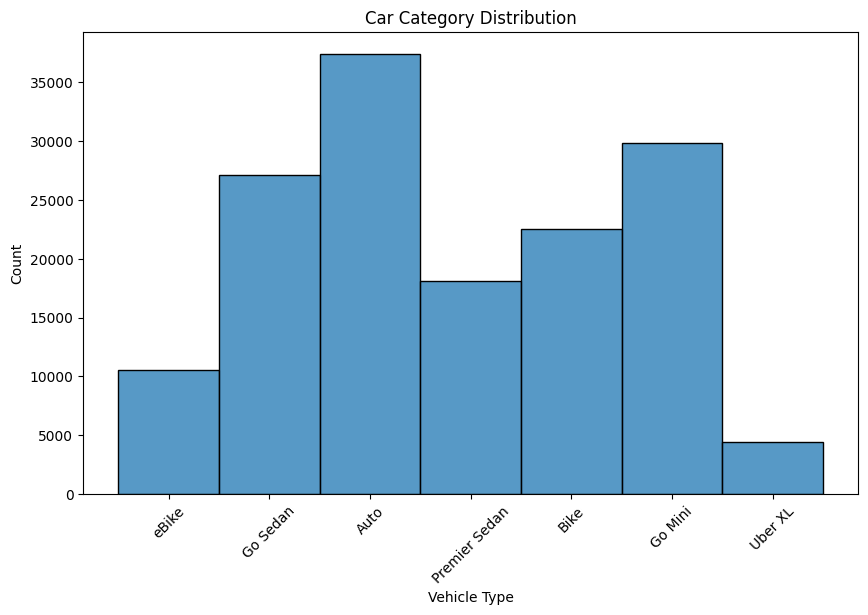

In [20]:
plt.figure(figsize=(10, 6)) # Memperbesar ukuran kanvas
sns.histplot(df['Vehicle Type'])
plt.title('Car Category Distribution')

# Putar label 45 derajat agar tidak tabrakan
plt.xticks(rotation=45)
plt.show()

#Based on the graph, the most frequently ordered type in the application is auto.

In [21]:
df.head()

,Time,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
Date,,,,,,,,,,,,,,,,,,
2024-03-23,2026-02-17 12:29:38,No Driver Found,eBike,Palam Vihar,Jhilmil,8.456352,29.149636,0.0,NaN,0.0,NaN,0.0,NaN,414.0,24.637012,4.230992,4.404584,UPI
2024-11-29,2026-02-17 18:01:39,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,0.0,NaN,0.0,NaN,1.0,Vehicle Breakdown,237.0,5.730000,4.230992,4.404584,UPI
2024-08-23,2026-02-17 08:56:10,Completed,Auto,Khandsa,Malviya Nagar,13.400000,25.800000,0.0,NaN,0.0,NaN,0.0,NaN,627.0,13.580000,4.900000,4.900000,Debit Card
2024-10-21,2026-02-17 17:17:25,Completed,Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,0.0,NaN,0.0,NaN,0.0,NaN,416.0,34.020000,4.600000,5.000000,UPI
2024-09-16,2026-02-17 22:08:00,Completed,Bike,Ghitorni Village,Khan Market,5.300000,19.600000,0.0,NaN,0.0,NaN,0.0,NaN,737.0,48.210000,4.100000,4.300000,UPI


Top 10 Lokasi Jemput:
Pickup Location
Khandsa             949
Barakhamba Road     946
Saket               931
Badarpur            921
Pragati Maidan      920
Madipur             919
AIIMS               918
Mehrauli            915
Dwarka Sector 21    914
Pataudi Chowk       907
Name: count, dtype: int64


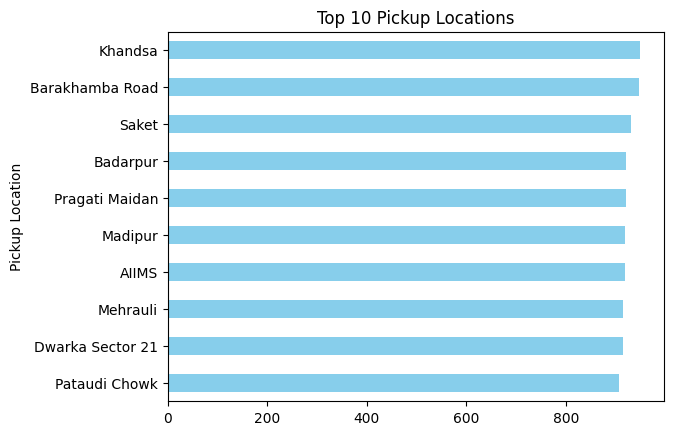

In [22]:
# Menghitung frekuensi tiap Pickup Location dan mengurutkannya
top_pickup = df['Pickup Location'].value_counts().head(10)
print("Top 10 Lokasi Jemput:")
print(top_pickup)

# Visualisasi sederhana
top_pickup.plot(kind='barh', color='skyblue')
plt.title('Top 10 Pickup Locations')
plt.gca().invert_yaxis() # Biar yang paling banyak ada di atas
plt.show()

Top 10 Lokasi Turun:
Drop Location
Ashram                936
Basai Dhankot         917
Lok Kalyan Marg       916
Narsinghpur           913
Cyber Hub             912
Kalkaji               912
Kashmere Gate ISBT    909
Udyog Vihar           906
Lajpat Nagar          904
Madipur               902
Name: count, dtype: int64


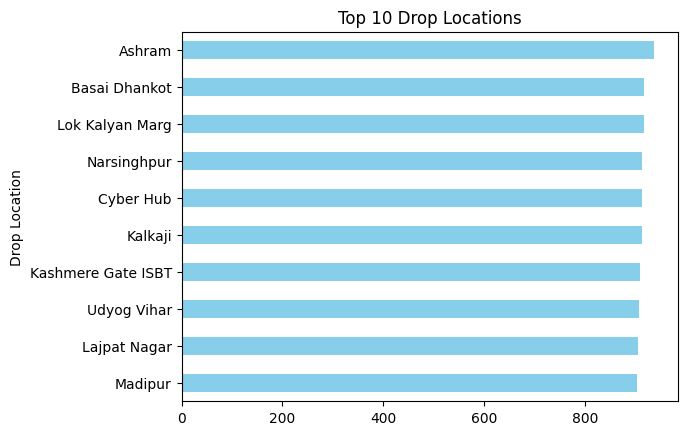

In [23]:
# Menghitung frekuensi tiap drop Location dan mengurutkannya
top_drop = df['Drop Location'].value_counts().head(10)
print("Top 10 Lokasi Turun:")
print(top_drop)

# Visualisasi sederhana
top_drop.plot(kind='barh', color='skyblue')
plt.title('Top 10 Drop Locations')
plt.gca().invert_yaxis() # Biar yang paling banyak ada di atas
plt.show()

# Average VTAT by Ride Cancellation Status

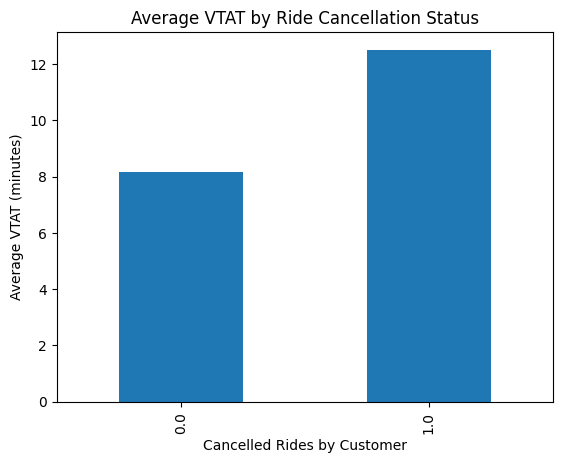

In [26]:
df.groupby('Cancelled Rides by Customer')['Avg VTAT'].mean().plot(kind='bar')
plt.title("Average VTAT by Ride Cancellation Status")
plt.ylabel("Average VTAT (minutes)")
plt.show()


# So, the conclusion from the Average VTAT by Ride Cancellation Status visualization above is that 0.0 explains that passengers who did not cancel were on average around 8 minutes away, and 1.0 means those who canceled and the average was around 12 minutes away.

# Average  CTAT by Ride Driver

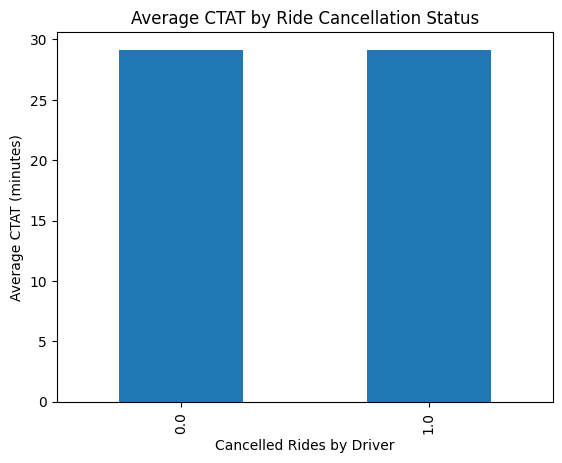

In [28]:
df.groupby('Cancelled Rides by Driver')['Avg CTAT'].mean().plot(kind='bar')
plt.title("Average CTAT by Ride Cancellation Status")
plt.ylabel("Average CTAT (minutes)")
plt.show()

# Average CTAT is nearly the same for rides cancelled by drivers and those not cancelled, indicating that customer turnaround time does not significantly influence driver cancellation behavior.

the meaning is :
1. Lama atau cepat customer respon tidak terlalu berpengaruh pada driver cancel
2. Driver cancel kemungkinan dipengaruhi faktor lain (jarak, lokasi, traffic, dll)

# Incompleteides and Incomplete Rides Reason

In [33]:
# STEP 1 — Focus only on the failed ride, (because of the numeric)
incomplete_only = df[df['Incomplete Rides'] == 1]

In [34]:
# STEP 2 — Count the most reasons (because oobject)
incomplete_only['Incomplete Rides Reason'].value_counts()


,count
Incomplete Rides Reason,
Customer Demand,3040
Vehicle Breakdown,3012
Other Issue,2948


Text(0, 0.5, 'Number of Incomplete Rides')

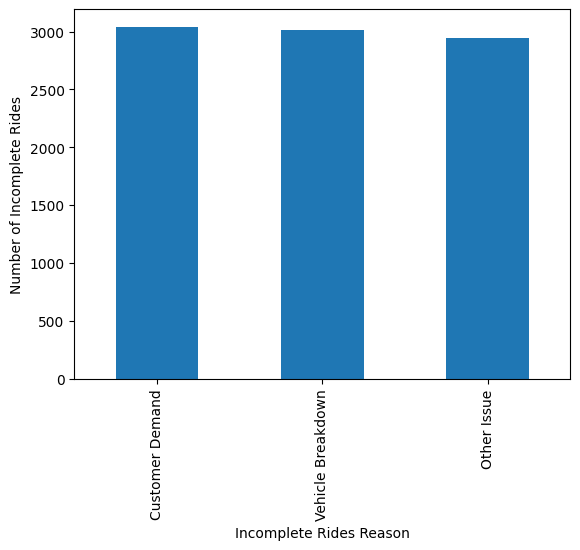

In [36]:
# STEP 3 — Most suitable visualization (bar chart)
incomplete_only['Incomplete Rides Reason'].value_counts().plot(kind='bar')
plt.ylabel('Number of Incomplete Rides')


# The number of incomplete rides is relatively similar across all reasons, indicating that no single factor dominates ride failures.

Text(0.5, 1.0, 'Ride Distance vs Booking Value')

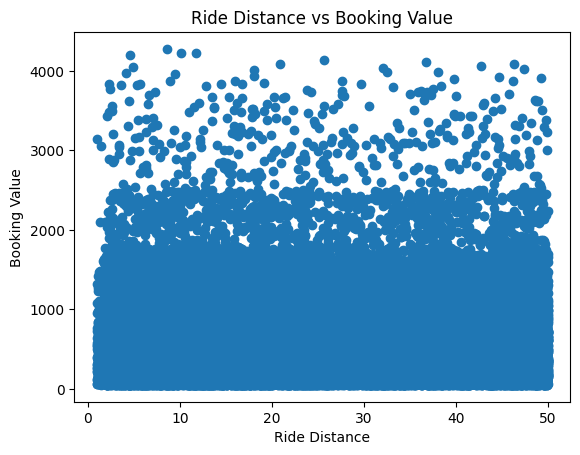

In [38]:
plt.scatter(df['Ride Distance'], df['Booking Value'])
plt.xlabel('Ride Distance')
plt.ylabel('Booking Value')
plt.title('Ride Distance vs Booking Value')


In [39]:
df['Ride Distance'].corr(df['Booking Value'])


np.float64(0.00512762144032603)

# There is a strong positive relationship between ride distance and booking value, meaning longer rides generally cost more.

# performence evaluation

In [41]:
df.groupby('Driver Cancellation Reason')['Driver Ratings'].mean()


,Driver Ratings
Driver Cancellation Reason,
Customer related issue,4.230992
More than permitted people in there,4.230992
Personal & Car related issues,4.230992
The customer was coughing/sick,4.230992


Text(0.5, 1.0, 'Average Driver Rating by Cancellation Reason')

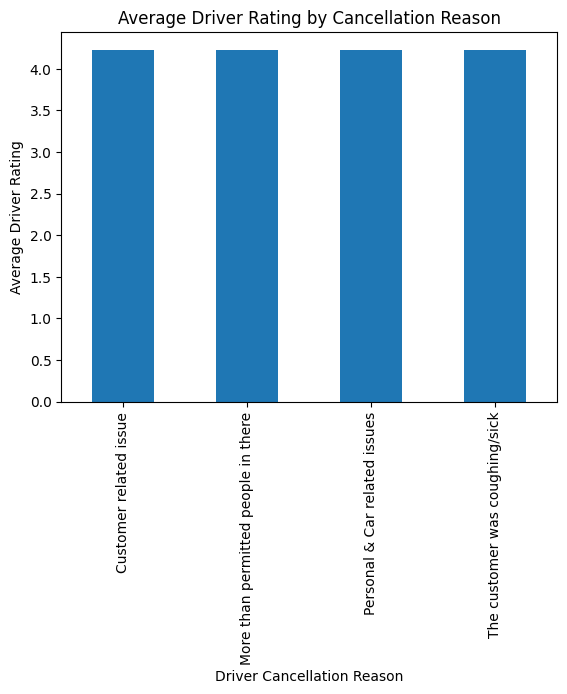

In [42]:
df.groupby('Driver Cancellation Reason')['Driver Ratings'].mean().plot(kind='bar')
plt.ylabel('Average Driver Rating')
plt.xlabel('Driver Cancellation Reason')
plt.title('Average Driver Rating by Cancellation Reason')


# The average driver rating is very similar across all cancellation reasons, indicating that driver performance (rating) is not a major factor influencing the type of cancellation.

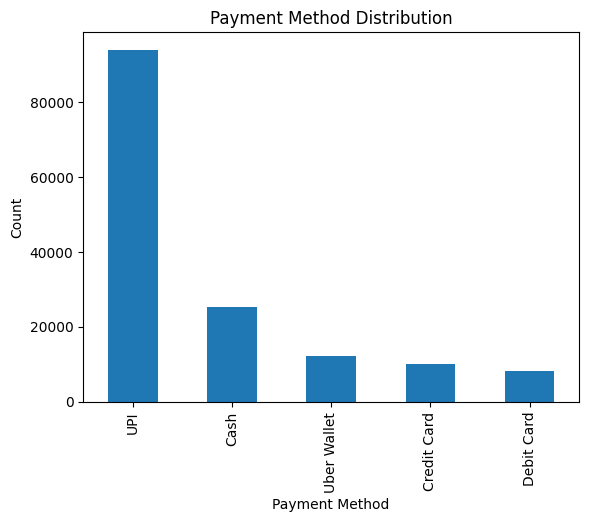

In [47]:
df['Payment Method'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# From the graph above, it can be concluded that the top 3 payment methods are Upi, then Cash and Uber Wallet.